# Классификация вина с использованием машинного обучения
В этом ноутбуке проводится классификация образцов вина с использованием моделей Random Forest и Logistic Regression.

### Загрузка необходимых библиотек
Импортируем необходимые библиотеки для работы с данными и машинным обучением.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

### Загрузка и исследование данных
Загружаем датасет и проводим базовый анализ данных, включая проверку на наличие пропусков.

In [3]:
df = pd.read_csv('Wine_TRAIN')
df.columns = range(len(df.iloc[0]))

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,225,226,227,228,229,230,231,232,233,234
0,1,1.7797,1.6389,1.5120,1.3920,1.2778,1.1704,1.06670,0.96700,0.87141,...,-1.6706,-1.7104,-1.7458,-1.7834,-1.8110,-1.8377,-1.8613,-1.8808,-1.9016,-1.9193
1,1,1.7765,1.6363,1.5083,1.3885,1.2755,1.1666,1.06350,0.96505,0.86839,...,-1.6739,-1.7139,-1.7488,-1.7865,-1.8142,-1.8409,-1.8645,-1.8841,-1.9045,-1.9226
2,1,1.7741,1.6351,1.5079,1.3887,1.2772,1.1716,1.06680,0.96652,0.87209,...,-1.6563,-1.6954,-1.7309,-1.7691,-1.7966,-1.8231,-1.8465,-1.8658,-1.8869,-1.9049
3,1,1.7765,1.6377,1.5109,1.3923,1.2791,1.1726,1.06920,0.97037,0.87466,...,-1.6552,-1.6947,-1.7302,-1.7684,-1.7958,-1.8219,-1.8448,-1.8646,-1.8857,-1.9037
4,1,1.7769,1.6366,1.5106,1.3923,1.2802,1.1735,1.07080,0.97174,0.87535,...,-1.6519,-1.6913,-1.7263,-1.7640,-1.7913,-1.8182,-1.8411,-1.8603,-1.8814,-1.8993
5,1,1.6584,1.5238,1.4031,1.2931,1.1898,1.0909,0.99478,0.90221,0.81188,...,-1.6567,-1.6938,-1.7287,-1.7662,-1.7917,-1.8176,-1.8391,-1.8583,-1.8789,-1.8950
6,1,1.6565,1.5245,1.4049,1.2939,1.1896,1.0898,0.99356,0.90179,0.81226,...,-1.6583,-1.6959,-1.7308,-1.7680,-1.7935,-1.8194,-1.8409,-1.8602,-1.8803,-1.8964
7,1,1.6603,1.5274,1.4062,1.2940,1.1902,1.0914,0.99570,0.90357,0.81369,...,-1.6567,-1.6943,-1.7287,-1.7667,-1.7922,-1.8177,-1.8392,-1.8580,-1.8790,-1.8955
8,1,1.7161,1.5791,1.4556,1.3401,1.2323,1.1290,1.03020,0.93495,0.84108,...,-1.6600,-1.6986,-1.7336,-1.7713,-1.7979,-1.8239,-1.8464,-1.8657,-1.8859,-1.9030
9,1,1.7180,1.5787,1.4543,1.3393,1.2319,1.1291,1.02850,0.93277,0.83979,...,-1.6596,-1.6987,-1.7332,-1.7710,-1.7979,-1.8240,-1.8464,-1.8658,-1.8860,-1.9030


In [5]:
df.iloc[:,0].value_counts() / len(df)

0
1    0.517857
2    0.482143
Name: count, dtype: float64

Проверка разнообразия данных в целом

<Axes: >

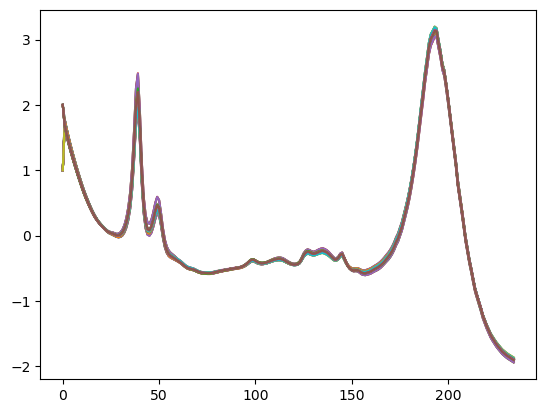

In [6]:
df.T.plot(legend=False)

Проверка разнообразия по классам

<Axes: >

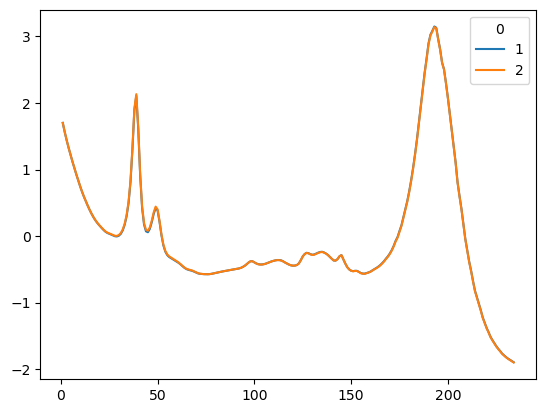

In [7]:
df.groupby(0).mean().T.plot()

### Построение моделей
В этой ячейке создаются модели случайного леса (Random Forest) и логистической регрессии (Logistic Regression).

In [8]:
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
rf.fit(df.iloc[:,1:], df.iloc[:,0])
lr.fit(df.iloc[:,1:], df.iloc[:,0])

LogisticRegression(random_state=42)

### Загрузка тестового набора и проверка качества модели

In [9]:
df_test = pd.read_csv('Wine_TEST')

#### Создание предсказаний

In [10]:
y_pred_rf = rf.predict(df_test.iloc[:,1:])
y_pred_lr = lr.predict(df_test.iloc[:,1:])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### Оценка модели
На этом этапе проводится оценка моделей на тестовых данных с использованием метрики accuracy (точность).

In [11]:
accuracy_score(df_test.iloc[:,0], y_pred_rf), accuracy_score(df_test.iloc[:,0], y_pred_lr)

(0.7924528301886793, 0.5283018867924528)